# **Credit Card Fraud Detection**

## Problem Statement
Credit card fraud is a major issue in the financial industry, costing billions of dollars annually. Fraudulent transactions are rare compared to legitimate ones, making them challenging to detect. Traditional rule-based systems are insufficient, and machine learning can provide a more robust solution by identifying patterns and anomalies in transaction data.

# Objective
The objective of this project is to build a **Machine Learning Model** that can accurately detect fraudlent credit card transactions.The model should:


1.   Maximize **recall** to recognize as many fraudlent transactions as possible.
2.   Maintain reasonable **precision** to  minimize false alarms.
3. Should be scalable  and efficient for real time fraud detection



### Dataset Overview
- **Source**: [Kaggle Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- **Features**: `V1-V28` (anonymized PCA-transformed features), `Time`, `Amount`.
- **Target**: `Class` (1 for fraud, 0 for non-fraud).
- **Imbalance**: Fraudulent transactions account for only **0.17%** of the dataset.

**Contains over 280K instances and only 492 are of positive class(i.e of
fraudulent transaction**)

### Tools and Technologies
- **Programming Language**: Python
- **Libraries**: Pandas, NumPy, Scikit-learn, XGBoost, Matplotlib, Seaborn
- **Environment**: Google Colab

### Data Collection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
path='/content/drive/MyDrive/Colab_Notebooks/creditcard.csv'
df=pd.read_csv(path)
print(df.head())
print(f"Total number of instances in the dataset is {df.shape[0]}")
print(f"Total number of features in the dataset is {df.shape[1]}")




   Time        V1        V2        V3        V4  ...       V26       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  1.378155  ... -0.189115  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  0.448154  ...  0.125895 -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  0.379780  ... -0.139097 -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993 -0.863291  ... -0.221929  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  0.403034  ...  0.502292  0.219422  0.215153   69.99      0

[5 rows x 31 columns]
Total number of instances in the dataset is 284807
Total number of features in the dataset is 31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data Preprocessing

In [5]:
pd.isnull(df).sum()
# This function will check for missing values in each column and return boolean i.e  True for missing and False for
# the values present and the sum() sums each True in the column and give the number of missing values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


After checking for the missing values in my dataset I have come to the conclusion that there aren't missing values, but let's suppose if I had missing values then I would have two options:


1.   To drop the rows or columns that had missing values using function **df.dropna()**
2.   To fill in the missing values using specific values i.e mean or median or any other similar technique using function **df.fillna()**

Now I don't need to that as fortunately there aren't any missing values in my dataset



## Separate Fraud and Non-Fraud Transactions
In this step, we separate the dataset into two classes:
- **Non-Fraud (Class 0)**: Legitimate transactions.
- **Fraud (Class 1)**: Fraudulent transactions.

We also keep track of the number of instances in each class.

In [6]:
non_fraud=df[df['Class']==0]
fraud=df[df['Class']==1]
print(f"Number of non-fraudulent transactions: {len(non_fraud)}")
print(f"Number of fraudulent transactions: {len(fraud)}")

Number of non-fraudulent transactions: 284315
Number of fraudulent transactions: 492


<ipython-input-7-88689cc99463>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Class',width=0.5,palette=['blue','red'])


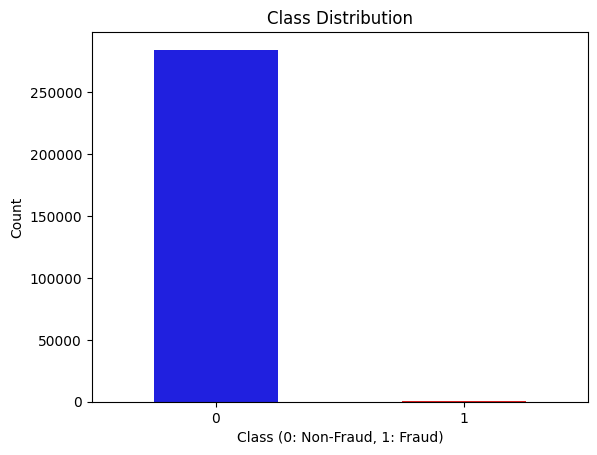

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x='Class',width=0.5,palette=['blue','red'])
plt.title("Class Distribution")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

As from the above histogram we can clearly see that there is a huge imbalance in the dataset which we need to cater elsewise our model will greatly biased towards the non fraud class 0.

## Handling Imbalance in the Dataset
### Hybrid Approach: Undersampling + SMOTE

To handle the extreme class imbalance effectively, we use a **hybrid approach**:
1. **Undersample the Majority Class**:
   - Randomly select **100,000 non-fraud samples** from the original dataset to reduce the majority class size.
2. **Combine with Minority Class**:
   - Merge the undersampled non-fraud data with the original fraud data.
3. **Apply SMOTE**:
   - Use **SMOTE (Synthetic Minority Oversampling Technique)** to generate synthetic fraud samples and balance the dataset.

This approach:
- Reduces the risk of **overfitting** from generating too many synthetic samples.
- Retains meaningful information from the majority class.
- Ensures a **balanced dataset** for training.


In [8]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

non_fraud_undersampled=resample(non_fraud,replace=False,n_samples=100000,random_state=42)
#Randomly selects a subset of data (e.g., 100K non-fraud samples) to reduce the majority class size.

print(f"After reducing the number of sample in the majority class i.e non fraudlent transactions shape of majority class is: {non_fraud_undersampled.shape}")
df_undersampled=pd.concat([non_fraud_undersampled,fraud])

#Now applying SMOTE: Generates synthetic samples for the minority class to balance the dataset.

X=df_undersampled.drop("Class",axis=1)
y=df_undersampled['Class']  #separating features and labels for SMOTE

smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

print(X_resampled.shape)
print(y_resampled.shape)

print("Class Distribution After Hybrid Approach:")
print(y_resampled.value_counts())

df_resampled=pd.concat([X_resampled,y_resampled],axis=1)
df_resampled





After reducing the number of sample in the majority class i.e non fraudlent transactions shape of majority class is: (100000, 31)
(200000, 30)
(200000,)
Class Distribution After Hybrid Approach:
Class
0    100000
1    100000
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82450.000000,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,-0.325347,-0.216435,0.084204,-1.054631,0.967932,0.601226,0.631117,0.295078,-0.136151,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.760000,0
1,50554.000000,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,0.821998,0.468322,-0.057550,0.573006,0.358688,-0.011633,-0.504570,0.722750,0.861541,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.180000,0
2,55125.000000,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,0.575866,-0.594037,1.097880,-0.338340,0.617523,-0.756390,0.535141,1.016704,2.133828,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.000000,0
3,116572.000000,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,-0.841133,-0.586472,-0.779620,-0.436671,0.747871,0.266437,0.703234,0.916719,-0.189967,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.000000,0
4,90434.000000,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,1.297531,-1.920966,1.885047,1.323225,-2.044482,1.317655,-0.441076,0.804104,-1.658339,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,12919.251722,-2.766536,5.925522,-12.095929,8.117756,-4.663469,-2.561026,-10.457914,3.754763,-4.298862,-11.676039,10.924579,-16.162850,0.469120,-15.685496,0.381518,-11.410446,-16.671871,-6.160784,2.401277,1.307681,1.957881,0.344417,0.596872,-0.937848,-1.272971,0.543883,1.625671,0.663884,1.000000,1
199996,35942.862794,-4.488522,5.224771,-5.875728,5.363454,-4.301396,-1.523996,-6.496930,3.253628,-5.228876,-7.370588,3.548655,-7.821820,1.573381,-8.238277,0.299185,-6.921703,-13.165131,-4.978721,1.975951,0.462043,1.381170,-0.182789,0.062353,-0.131047,-0.172849,-0.014074,0.369997,0.432852,71.474066,1
199997,96636.502574,-3.463406,4.029521,-3.458832,2.297496,-3.225833,1.402415,-8.925254,-10.942029,-0.625816,-6.103515,2.154407,-4.672455,2.106613,-0.890649,1.128617,-4.210934,-5.293958,-1.444437,2.451670,3.407990,-5.014587,2.691440,0.783775,-0.249955,-0.278131,-0.474293,-0.198143,-0.034275,3.484079,1
199998,58250.518318,0.248312,2.039645,-3.030353,3.873684,-0.833226,-1.020389,-2.398010,0.397834,-2.229859,-3.203916,3.578877,-3.999523,-1.061795,-5.740518,-0.033676,-1.872516,-4.623286,-0.829414,0.064813,0.373012,0.197931,-0.457781,-0.031650,-0.292848,0.405279,-0.013145,0.541751,0.281908,14.794717,1


## Visualizing the Balanced Dataset

After balancing the dataset using the **hybrid approach (undersampling + SMOTE)**, we visualize the results to understand the new class distribution and the impact of balancing.

### Key Visualizations:
1. **Class Distribution After Balancing**:
   - A bar plot to show the balanced distribution of fraud and non-fraud transactions.
2. **Feature Distribution**:
   - Histograms or boxplots to compare the distribution of key features (e.g., `Amount`) before and after balancing.
3. **Correlation Heatmap**:
   - A heatmap to visualize correlations between features in the balanced dataset.

These visualizations will help us understand the dataset better and ensure that the balancing process has been effective.

<ipython-input-9-cbb23909ae58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resampled,x='Class',width=0.5,palette=['blue','red'])


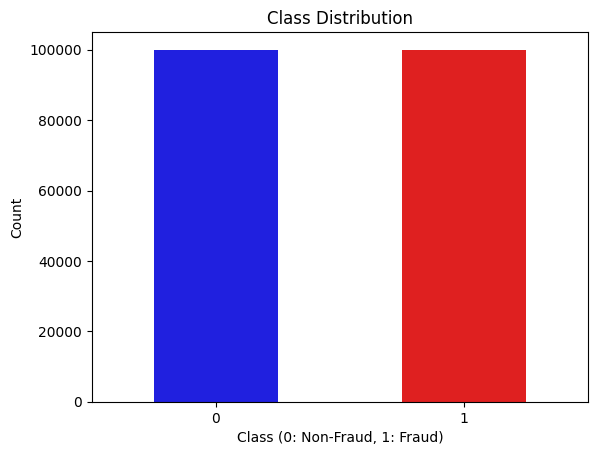

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df_resampled,x='Class',width=0.5,palette=['blue','red'])
plt.title("Class Distribution")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

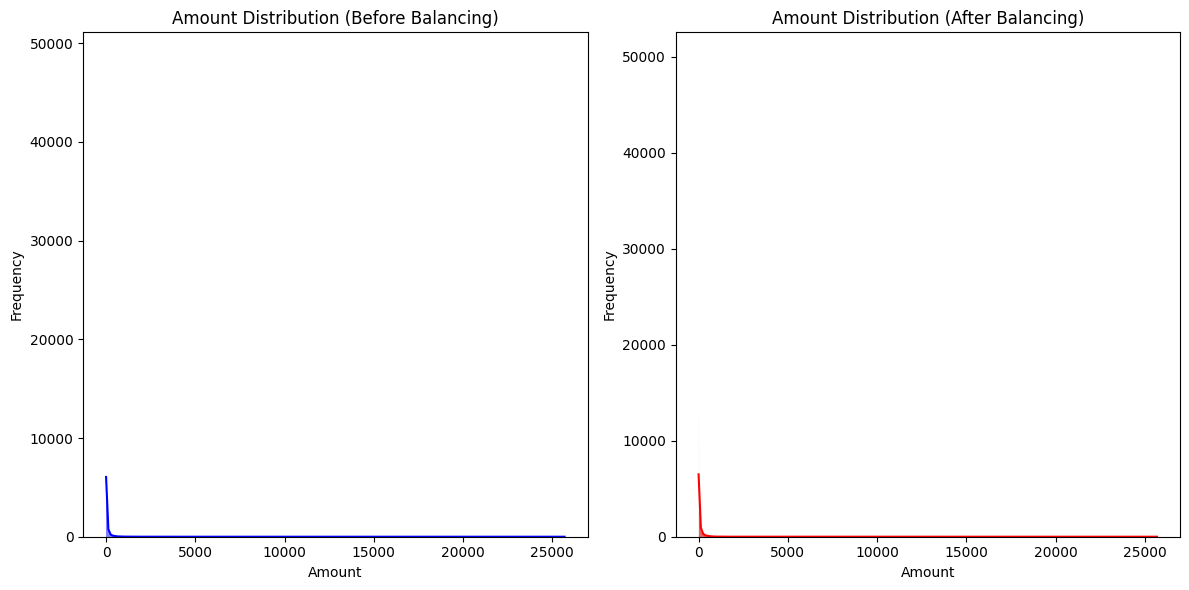

In [10]:
# Compare 'Amount' distribution before and after balancing
plt.figure(figsize=(12, 6))

# Before balancing
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], kde=True, color='blue')
plt.title("Amount Distribution (Before Balancing)")
plt.xlabel("Amount")
plt.ylabel("Frequency")

# After balancing
plt.subplot(1, 2, 2)
sns.histplot(X_resampled['Amount'], kde=True, color='red')
plt.title("Amount Distribution (After Balancing)")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

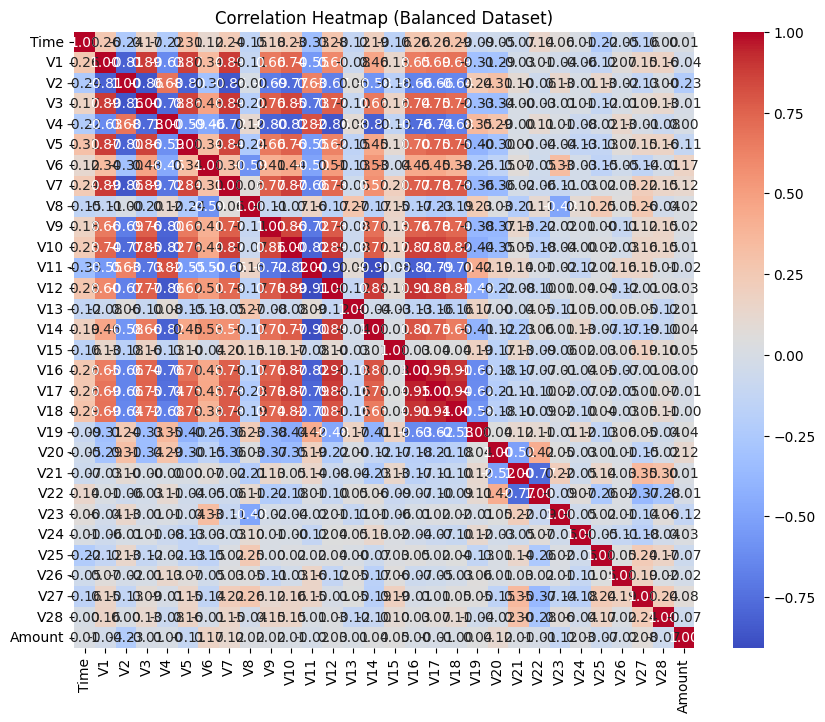

In [11]:
# Correlation heatmap for the balanced dataset
plt.figure(figsize=(10, 8))
sns.heatmap(X_resampled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Balanced Dataset)")
plt.show()

## Feature Engineering

Feature Engineering essentially is creating some meaningful features from your exsisting features i.e by multiplying  two features that can capture the pattern in a better way and removing the redundant features.

Following are the steps:
1. **New Features**:
   - **`Hour`**: Extract hour from `Time`.
   - **`Time_Since_Last_Transaction`**: Calculate time difference between transactions.
   - **`Amount_Scaled`**: Scale the `Amount` feature.
2. **Features to Drop**:
   - Original `Time` and `Amount`.
   - Highly correlated features (if any).
3. **Final Features**:
   - Use `V1-V28`, `Hour`, `Time_Since_Last_Transaction`, and `Amount_Scaled`.

In [12]:
df['hour']=df['Time']%24   #dividing the time by 24 to get the hour at which transaction was made
df['Time_Since_Last_Transaction']=df['Time'].diff().fillna(0)
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour,Time_Since_Last_Transaction
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,10.0,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,11.0,1.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,12.0,1.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,12.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['scaled_amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour,Time_Since_Last_Transaction,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0,1.0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0,0.0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2.0,1.0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,10.0,1.0,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,11.0,1.0,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,12.0,1.0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,12.0,0.0,-0.313249


In [14]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X,y)

importance=model.feature_importances_
feature_importance_df=pd.DataFrame({'Feature':X.columns,'Importance':importance})
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)
print(feature_importance_df)

   Feature  Importance
17     V17    0.176762
14     V14    0.160912
12     V12    0.126769
10     V10    0.096292
16     V16    0.078187
11     V11    0.053797
9       V9    0.033848
4       V4    0.030720
18     V18    0.028456
7       V7    0.024423
3       V3    0.021440
1       V1    0.012992
2       V2    0.011624
21     V21    0.011212
19     V19    0.010833
15     V15    0.010799
8       V8    0.009889
13     V13    0.009229
29  Amount    0.008972
5       V5    0.008429
6       V6    0.008226
20     V20    0.008166
26     V26    0.008131
22     V22    0.007828
27     V27    0.007730
0     Time    0.007599
25     V25    0.007355
23     V23    0.007263
28     V28    0.006689
24     V24    0.005430


In [15]:
#From the feature importance report selecting the top 10 important features and adding the newly created features
selected_features=['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V9', 'V4', 'V18', 'V7']
selected_features.extend(['hour','Time_Since_Last_Transaction','scaled_amount'])
print(selected_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V9', 'V4', 'V18', 'V7', 'hour', 'Time_Since_Last_Transaction', 'scaled_amount']


In [16]:
X_final=df[selected_features]
y_final=df['Class']

## Train-Test Split

The dataset is split into **training (70%)** and **testing (30%)** sets while maintaining the class distribution using `stratify=y`. This ensures balanced representation of fraud and non-fraud cases in both sets.

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.3,random_state=42,stratify=y_final)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 13)
(85443, 13)
(199364,)
(85443,)


## Model Training

In this step, we train a machine learning model to detect fraudulent transactions. We start with a baseline model (e.g., Logistic Regression) and then experiment with more advanced models (e.g., Random Forest, XGBoost). The model is evaluated using metrics like Recall, Precision, and F1-Score to ensure it performs well on imbalanced data.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score

Log_model=LogisticRegression(max_iter=1000,random_state=42)
Log_model.fit(X_train,y_train)
y_pred=Log_model.predict(X_test)
y_pred_prob=Log_model.predict_proba(X_test)[:,1]
print("******Classification Report******")
print(classification_report(y_test,y_pred))
print("******ROC_AUC_Score******")
print(roc_auc_score(y_test,y_pred_prob))


******Classification Report******
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.57      0.67       148

    accuracy                           1.00     85443
   macro avg       0.92      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443

******ROC_AUC_Score******
0.9605101848433815


In [21]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(random_state=42)
RF_model.fit(X_train,y_train)
y_pred=RF_model.predict(X_test)
print("******Classification Report******")
print(classification_report(y_test,y_pred))

******Classification Report******
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.78      0.86       148

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [22]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)
print("******Classification Report******")
print(classification_report(y_test,y_pred))

******Classification Report******
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.78      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



## Confusion Matrix

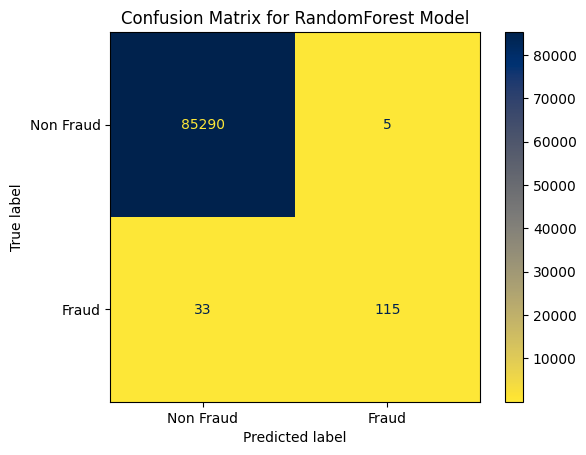

In [40]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred=RF_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non Fraud','Fraud'])
disp.plot(cmap="cividis_r",values_format='d')
plt.title("Confusion Matrix for RandomForest Model")
plt.show()

In [41]:
import joblib as jb
jb.dump(RF_model,'Credit_Card_Fraud_Detection_Model.pkl')

['Credit_Card_Fraud_Detection_Model.pkl']